### Problem 

The sine series expansion is given as:  
$$\sin(x)=x-\dfrac{x^3}{3!}+\dfrac{x^5}{5!}-\dfrac{x^7}{7!}+\dfrac{x^9}{9!}-\;.\;.\;.$$  
You get closer and closer to actual value as you compute more and more terms.  
- Write a function `factorial(n)` to quickly get factorials. 
- Using the factorial function, write a function `sin(x,n)` which takes 2 arguments $x$ in degrees and $n$ the number of terms to compute and return approximate value of sine. `This is to demonstrate using function inside another function`
- Further print the output of your function for $n$ in range 1 to 10. Notice how correct value is approached.


In [3]:
import numpy as np

In [1]:
def factorial(n):
    f = 1
    for i in range(1,n+1):
        f = f*i
    return f

In [2]:
def sin(x,n):
    result = 0
    for i in range(n):
        sign = (-1)**i
        result += ((np.deg2rad(x)**(2*i+1))/factorial(2*i+1))*sign
    return result

In [5]:
sin(45,10)

0.7071067811865475

# Numerical Differentiation
<br >

In numerical analysis, [finite differences](https://en.wikipedia.org/wiki/Finite_difference#Forward,_backward,_and_central_differences) are widely used for approximating derivatives, and the term "finite difference" is often used as an abbreviation of "finite difference approximation of derivatives".  

The derivative of function $f(x)$ at $x=a$ is,  
<br >
<br >
 

$$f'(a) = \lim\limits_{h \to 0}\dfrac{f(a+h)-f(a)}{h}$$  

<br >
<br >

---
<br >

There are [3 main difference](https://en.wikipedia.org/wiki/Finite_difference#:~:text=Three%20basic%20types%20are%20commonly%20considered%3A%20forward%2C%20backward%2C%20and%20central%20finite%20differences.) formulas for numerical approximation: 
- Forward difference
- Backward difference
- Central difference  

<br >
We'll use the forward difference and you can try the other ones by yourself



In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
def derivative(f,a,h):
    return (f(a+h)-f(a))/h

In [65]:
# Testing function on e^x
derivative(np.exp,0,0.0001)

1.000050001667141

In [66]:
derivative(np.cos,0,0.1)

-0.049958347219742905

In [67]:
derivative(np.log,2,0.01)

0.4987541511038973

In [71]:
derivative(lambda x: ((4*x**2 + 2*x + 1)/(x + 2*np.exp(x)))**x,3,0.0001)

-1.0385994145123423

# Numerical Integration

## Trapezoidal Rule

It is defined as,  

$$\int_{a}^{b}f(x)\,dx\,\approx \sum_{k=1}^{N}\dfrac{f(x_{k-1})+f(x_k)}{2}\Delta x_k$$

When the partition has a regular spacing, as is often the case, that is, when all the $\Delta x_k$ have the same value $\Delta x$, the formula can be simplified for calculation efficiency by factoring $\Delta x$ out:  

$$\int_{a}^{b}f(x)\,dx\,\approx \dfrac{\Delta x}{2}(f(x_0)+2f(x_1)+2f(x_2)+2f(x_3)+\dots+2f(x_{N-1})+f(x_N))$$

In [3]:
import numpy as np

In [43]:
def trapezoid(f,a,b,N):
    x = np.linspace(a,b,N+1)
    y = f(x)
    dx = (b-a)/N
    index = [0,-1]
    z = np.delete(y,index)
    r = (dx/2)*(y[0]+2*np.sum(z)+y[-1])
    return r

In [44]:
trapezoid(np.sin,0,np.pi/2,1000)

0.9999997943832332

In [55]:
trapezoid(lambda x : 2*(6**2-x**2)**0.5,-6,6,10000)

113.09721578750094

In [56]:
np.pi*6**2

113.09733552923255

In [63]:
def func(x):
    return x*np.exp(-x)
trapezoid(func,0,5,10000)

0.9595722966106585

## Simpson's Rule
  
$$\int_{a}^{b}f(x)dx\approx\dfrac{h}{3}\Bigg(f_0+f_n+\Big(4\times\sum_{i=1,3,5...}^{n-1}f_i\Big)+\Big(2\times\sum_{i=2,4,6...}^{n-2}f_i\Big)\Bigg)$$  
where, $n$ is the number of intervals you're dividing  
$h=\dfrac{b-a}{n}$ is the width of your interval.

In [17]:
def simpson(f,a,b,n):
    h = (b-a)/n
    x = []
    yx = []
    i = 0
    while i<=n:
        x.append(a+i*h)
        yx.append(f(x[i]))
        i+=1
    
    I = 0
    j = 0
    while j<=n:
        if j == 0 or j == n:
            I += yx[j]
        elif j%2 != 0:
            I += 4*yx[j]
        else:
            I += 2*yx[j]
        j += 1
    I = (h/3)*I
    #print(yx)
    return I

In [5]:
simpson(lambda x:x*np.exp(-x),0,10,100)

0.9994989372315642

In [12]:
simpson(lambda x:x**5*np.exp(-x),0,100,10000)

119.99999999999935

# Gamma Function

The gamma function is defined for all complex numbers except the non-positive integers. For any positive integer $n$,
$$\Gamma(n)=(n-1)!$$  
Derived by Daniel Bernoulli, for complex numbers with **`positive real part`**, the gamma function is defined via a convergent improper integral:
$$\Gamma(n) = \int\limits_{0}^{\infty}x^{n-1}e^{-x}dx,\;\;\;\;\;\;\;\;\;\;\;\;\;\mathcal{R}(n)>0$$
Some forms to remember are:    
<br >
$\Gamma(1)=1$  
<br >
$\Gamma(n+1)=n\cdot\Gamma(n)=n!$  
<br >
 
## Simpson's Rule


$$\int_{a}^{b}f(x)dx\approx\dfrac{h}{3}\Bigg(f_0+\Big(4\times\sum_{i=1,3,5...}^{n-1}f_i\Big)+\Big(2\times\sum_{i=2,4,6...}^{n-2}f_i\Big)+f_n\Bigg)$$  
where, $n$ is the number of intervals you're dividing your function into   
$h=\dfrac{b-a}{n}$ is the width of your interval.

---

### Problem 

- Write a function named `simpson(f,a,b,n)` where `f` is the function (integrand) `a` and `b` are lower and upper limits respectively and `n` is the number of intervals.  
    Define the integrand as a separate function and use it in simpson function **`or`** write a lambda function as the argument in simpson function.  
    

- **`Calculate`**
    - Value of factorial of a fraction $\left(\frac{1}{3}\right)!$
    - Value of $\left(2\cdot\Gamma\left(\frac{3}{2}\right)\right)^2$
<br >

`**Note**` : Take upper limit 100 or 1000 instead of $\infty$ while calculating gamma function.

In [1]:
import numpy as np

def simpson(f,a,b,n):
    h = (b-a)/n
    x = []
    yx = []
    i = 0
    while i<=n:
        x.append(a+i*h)
        yx.append(f(x[i]))
        i+=1
    
    I = 0
    j = 0
    while j<=n:
        if j == 0 or j == n:
            I += yx[j]
        elif j%2 != 0:
            I += 4*yx[j]
        else:
            I += 2*yx[j]
        j += 1
    I = (h/3)*I
    #print(yx)
    return I

def gamma(z):
    return simpson(lambda x : x**(z-1)*np.exp(-x),0,1000,100000)

In [3]:
# (1/3)! 
gamma(4/3)

0.8926844042039226

$\Gamma\left(\frac{3}{2}\right)=\frac{1}{2}\sqrt{\pi}$  
$\therefore\pi=\left(2\cdot\Gamma\left(\frac{3}{2}\right)\right)^2$

In [4]:
(2*gamma(3/2))**2

3.14101609084524

# Reimann Zeta

The [Riemann zeta](https://en.wikipedia.org/wiki/Riemann_zeta_function) function has applications in physics, probability theory and applied statistics.  

- $\zeta\left(\frac{3}{2}\right)$ is employed in calculating the [critical temperature for a Bose-Einstein condensate](https://en.wikipedia.org/wiki/Bose%E2%80%93Einstein_condensate#Critical_temperature) in a box with periodic boundary conditions, and for spin wave physics in magnetic systems.  


- $\zeta(4)$ appears when integrating Planck's Law to derive the [Stefan-Boltzmann Law](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law#:~:text=The%20value%20of%20the%20integral,for%20a%20perfect%20blackbody%20surface%3A) in physics.

The function can be writte as converging summation or integral:  
$$\zeta(s) = \sum\limits_{n=1}^{\infty}\dfrac{1}{n^s}=\dfrac{1}{\Gamma(s)}\int\limits_{0}^{\infty}\dfrac{x^{s-1}}{e^x-1}dx$$  
where  
$$\Gamma(s)=\int\limits_{0}^{\infty}x^{s-1}e^{-x}dx$$  

---

### Problem 

Write a function named `reimannzeta(s)`, use the simpson function and gamma functions written in the previous problem to calculate the zeta function. **Note** While writing the simpson function inside zeta function put lower limit as 0.0001, as putting 0 will give `ZeroDivisionError`. And put the upper limit 100 or 1000 like you did for gamma function.  

Find out the values for 
- $\zeta(3/2)$   
<br >  

- $\zeta(2)$  
<br >  

- $\zeta(3)$  
<br >  

- $\zeta(4)$

In [5]:
def riemannzeta(s):
    return (1/gamma(s))*simpson(lambda x: x**(s-1)/(np.exp(x)-1),0.000062,100,100000)

# Lower value was choosen after trial and error to get as accurate result as possible

In [6]:
riemannzeta(3/2)

2.612377957384106

In [7]:
riemannzeta(2)

1.6448720680832587

In [8]:
riemannzeta(3)

1.202056901998226

In [9]:
riemannzeta(4)

1.0823232337711812

# Error Function  

In mathematics, the [error function](https://en.wikipedia.org/wiki/Error_function) also called as Gauss error function is denoted by **`erf`**.  
In statistics, for non-negative values of $x$, the error function has the following interpretation: for a random variable $Y$ that is normally distributed with mean 0 and standard deviation $\frac{1}{\sqrt{2}}$, **erf x** is the probability that $Y$ falls in range $[-x,x]$.   
The function is defined as:  
$$\text{erf}\,z=\dfrac{2}{\sqrt{\pi}}\int\limits_{0}^{z}e^{-x^2}dx$$
The complementary error function is denoted by **erfc**.  
<br >

$$\text{erfc}\,x = 1 - \text{erf}\,x$$  
<br >

This is useful in determining the bit error rate of digital communication system. The [bit error rate (BER)](https://en.wikipedia.org/wiki/Bit_error_rate) is the number of bit error per unit time.  

---

### Problem 

Write a function named `erf(z)`, using the simpson function from above problem, calcute erf for different values of your choice. [Verify your results by referring to this table](https://en.wikipedia.org/wiki/Error_function#Table_of_values)
<br >

Your output should look something like this:  

In [10]:
def erf(z):
    return (2/np.sqrt(np.pi))*simpson(lambda x : np.exp(-(x**2)),0,z,10000)

In [11]:
erf(0.2)

0.2227025892104785

In [12]:
erf(2)

0.995322265018955

In [13]:
erf(3)

0.9999779095030026

# Work

If a force $F(x)$ is applied on a object and it moves from point a to b then the work done is given by,  
$$W = \int\limits_{a}^{b}F(x)dx$$  

Also, $F(x) = k.x$  

### Problem 

A spring of length 20 cm is stretched to 30 cm by applying 40 N of force. How much work is done in stretching the spring further from 30 cm to 50 cm?

In [14]:
def work(f,a,b,n):
    return simpson(f,a,b,n)

displacement = 30 - 20 = 10 cm = 0.1 m. 

40 = k x 0.1  

k = 400  

F(x) = 400x

In [15]:
print(f"{round(work(lambda x: 400*x,0.3,0.5,100),2)} J of work done.")

32.0 J of work done.


### Problem

Consider the flower petal $r(\theta)=1+\frac{3}{4}\sin(3\theta)\;\;\;\text{for}\;\;\;0\leq\theta\leq2\pi$  

1. Make a plot of the flower
2. Compute area using the formula $\mathcal{A}=\int\limits_{0}^{2\pi}\frac{1}{2}r^2d\theta$  
3. Compute the arclength using the formula $\mathcal{L}=\int\limits_{0}^{2\pi}\sqrt{r^2+\left(\frac{dr}{d\theta}\right)^2}\;d\theta$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

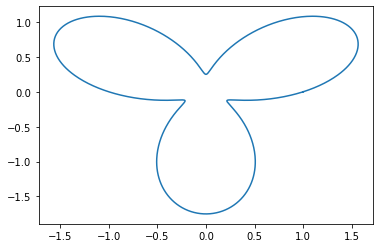

In [15]:
t = np.linspace(0,2*np.pi,1000)
r = 1 + (3/4)*np.sin(3*t)

x = r*np.cos(t)
y = r*np.sin(t)

plt.plot(x,y)

In [16]:
# Area
A = 1/2 * sum(r**2) * (t[1]-t[0])
A

4.028310324802908

In [21]:
# Arc length
sum(np.sqrt(r**2 + np.gradient(r,t)**2))*(t[1]-t[0])

11.64002156901387